### Goldsmiths University of London
### Author....: Carlos Manuel de Oliveira Alves
### Student...: cdeol003
### Created...: 08/02/2023
### FYP.......: NeuroCredit

In [1]:
# Importing the pandas library to read the data
import pandas as pd

In [2]:
# Reading the data with credit loans data
data = pd.read_csv('data.csv')

In [3]:
# Printing the first 5 rows of the data
data.head().T

,0,1,2,3,4
credit_history,Poor,Poor,Excellent,Fair,Good
employment_status,Self-Employed,Unemployed,Unemployed,Unemployed,Unemployed
collateral,None,Investment,House,Car,House
payment_history,Fair,Excellent,Poor,Good,Excellent
type_of_credit_accounts,Auto,Mortgage,Other,Other,Personal
public_records_and_collections,Judgement,Collection,Bankruptcy,Tax Lien,None
purpose_of_loan,Debt Consolidation,Home Improvement,Debt Consolidation,Home Improvement,Business
income,30971,19120,48687,40997,35485
assets_value,11969,45396,18880,11527,27016
debt_to_income_ratio,78,81,73,6,33


In [4]:
# Import Necessary Libraries with sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [5]:
# Split the data into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
# Print the number of rows and columns in the train and test sets
print('Train set: ', train.shape)
print('Test set: ', test.shape)

Train set:  (800, 20)
Test set:  (200, 20)


In [7]:
# Create Logistic Regression model
logistic_regression = LogisticRegression()

# One-hot encode the string values in the train and test datasets
encoder = OneHotEncoder(handle_unknown='ignore')
X_train = encoder.fit_transform(train.drop(columns=['approval_status']))
X_test = encoder.transform(test.drop(columns=['approval_status']))

# Create y_train with the target column from the training set
y_train = train['approval_status']

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the y_train labels using the LabelEncoder
y_train = encoder.fit_transform(y_train)

# Train the model on the training set
logistic_regression.fit(X_train, y_train)

# Make predictions for the test set
predictions = logistic_regression.predict(X_test)

# Create y_test with the target column from the test set
y_test = test['approval_status']

# Transform the y_test labels using the LabelEncoder (without re-fitting)
y_test = encoder.transform(y_test)

# Print the first 5 predictions
print("First 5 Predictions:")
for i, prediction in enumerate(predictions[:5]):
    print(f"{prediction} - The model predicts that the {i + 1} example belongs to class {prediction}.")

# Print the first 5 probabilities of the predictions
probabilities = logistic_regression.predict_proba(X_test)[:5]
print("\nFirst 5 Probabilities:")
for i, probability in enumerate(probabilities):
    class_0_prob = probability[0]
    class_1_prob = probability[1]
    class_0_prob_pct = round(class_0_prob * 100, 2)
    class_1_prob_pct = round(class_1_prob * 100, 2)
    print(f"[{class_0_prob:.2f}, {class_1_prob:.2f}] - {class_1_prob_pct:.2f}% probability of class 1, {class_0_prob_pct:.2f}% probability of class 0.")

# Evaluate the performance of the model
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the performance metrics
print('\nAccuracy...: {:.2f} %'.format(acc*100))
print('Precision..: {:.2f} %'.format(prec*100))
print('Recall.....: {:.2f} %'.format(rec*100))
print('F1 Score...: {:.2f} %'.format(f1*100))

First 5 Predictions:
1 - The model predicts that the 1 example belongs to class 1.
1 - The model predicts that the 2 example belongs to class 1.
1 - The model predicts that the 3 example belongs to class 1.
0 - The model predicts that the 4 example belongs to class 0.
1 - The model predicts that the 5 example belongs to class 1.

First 5 Probabilities:
[0.01, 0.99] - 98.85% probability of class 1, 1.15% probability of class 0.
[0.00, 1.00] - 99.81% probability of class 1, 0.19% probability of class 0.
[0.00, 1.00] - 99.51% probability of class 1, 0.49% probability of class 0.
[0.54, 0.46] - 45.92% probability of class 1, 54.08% probability of class 0.
[0.01, 0.99] - 99.36% probability of class 1, 0.64% probability of class 0.

Accuracy...: 87.50 %
Precision..: 90.61 %
Recall.....: 95.35 %
F1 Score...: 92.92 %


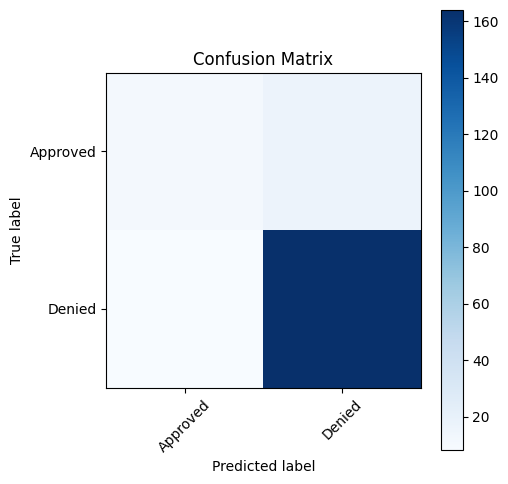

In [16]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Approved', 'Denied'], rotation=45)
plt.yticks(tick_marks, ['Approved', 'Denied'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()